# pH and Dying
Meagan Rittmanic & Dieter Brehm - Project 1 - Fall 2018  
A project examining how to model an assumed relation between crustaceans and pH levels

In [2]:
# Configure Jupyter so figures appear in the noebook
%matplotlib inline

# import functions from the modsim.py module
from modsim import *
import random
import matplotlib.pyplot as plt

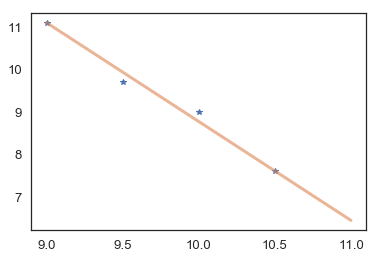

In [8]:
# Plot our data points for pH levels and crustacean birth rates 
plt.plot([9,9.5,10,10.5], [11.1, 9.7, 9, 7.6], '*')

# Create a best-fit line
def run_match():
    match = TimeSeries()
    match[9] = 11.1
    for p in linrange(9, 11, 1):
        match [p+1] = match[p] - 2.33
    return match

# overlay the fit line with our data
p2 = run_match()
plot (p2)
plt.show()

In [5]:

def run_match2():
    match = TimeSeries()
    match[9] = 11.1
    for p in linrange(9, 11, 1):
        match [p+1] = match[p] - 2.33
    return match[11]
run_match2()

6.4399999999999995

In [80]:
# set our constants
birth_rate_normal = 0.12
birth = run_match2()
birth1 = birth_rate_normal*(birth/11.1)
values = System(death=0.1, birth_lb = birth1-0.07, birth_ub = birth1+0.07, pop_0 = 40, time_period = 52)

In [81]:
def run_ph_sim(system):
    """
    Runs the simulation

    system: a System object with our initial constants, relies on:
            - pop_0: initial population
            - birthi: lower range deviation of birthrate due to pH
            - birthii: upper range deviation of birthrate due to pH
            - death: death rate
            - time period: how many weeks to run the simulation for

    Return TimeSeries with results
    """
    run = TimeSeries()
    run[0] = system.pop_0
    for t in linrange (0, values.time_period, 1):
        for x in range(1):
            b = random.uniform(system.birth_lb, system.birth_ub)
        run[t+1] = run[t] + run[t]*(b)-run[t]*(system.death)
    return run

def plot_rps(variable, title):
    """
    Plots data

    variable: the data we want to graph 
    title: the title of the graph

    directly plots data with no return statement
    """
    plot (variable, label = 'crustacean population')
    decorate(xlabel = 'time (weeks)',
            ylabel = 'population of crustaceans',
            title = title)

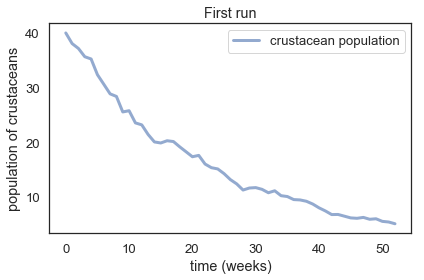

In [82]:
x = run_ph_sim(values)
plot_rps(x, 'First run')

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


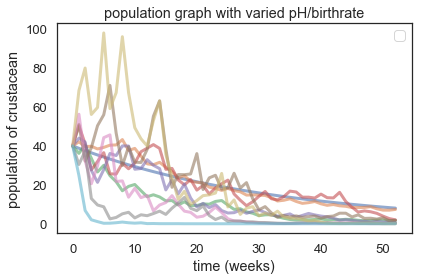

In [104]:
# sweep for a few different ranges
birth_ub_array = linspace(0, 0.9, 10);

for rate in birth_ub_array:
    # for now, let's keep the upper and lower limits absolute value the same
    print(rate)
    values.birth_lb = birth1 - rate
    values.birth_ub = birth1 + rate
    x = run_ph_sim(values)
    plot(x)
    
decorate(xlabel = 'time (weeks)',
         ylabel = 'population of crustacean',
         title = "population graph with varied pH/birthrate")

In [86]:
def run_ph_sim2(system):
    """
    Runs the simulation

    system: a System object with our initial constants, relies on:
            - pop_0: initial population
            - birthi: lower range deviation of birthrate due to pH
            - birthii: upper range deviation of birthrate due to pH
            - death: death rate
            - time period: how many weeks to run the simulation for 

    Return TimeSeries with 52nd result
    """
    run = TimeSeries()
    run[0] = system.pop_0
    
    for t in linrange (0, values.time_period, 1):
        for x in range(1):
            # randomly select a decimal number between
            # the lower and upper birth rate(pH) bounds
            b = random.uniform(system.birth_lb, system.birth_ub)
        run[t+1] = run[t] + run[t]*(b)-run[t]*(system.death)
    return run[52]

In [75]:
def run_program(number_of_runs, system, state):
    """
    Runs the simulation multiple times

    number_of_runs: how many times we want to run the simulation
    system: a System object with our initial constants, relies on:
            - extinct: tracks number of runs in which the population went extinct
    state: a State object with the number of extinctions that have occured
    
    """
    for i in range (number_of_runs):
        x = run_ph_sim2(system)
        if x<=8:
            extinct.extinct +=1
    return extinct.extinct

In [76]:
# run the simulation 100 times
extinct = State(extinct = 0)
extinctions = run_program(12, values, extinct)
print(extinctions)

7
